In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("C:/Users/gpro0/OneDrive/Рабочий стол/Data Science course/house_kg_10K_ads.csv/house_kg_10K_ads.csv")
df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,Site,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,Site,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,Site,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,Site,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,Site,хорошее


In [3]:
df.micro_district.nunique()

134

In [4]:
df.groupby('district').price.agg(['sum', "min", "max", "mean"])

,sum,min,max,mean
district,,,,
Ленинский район,154288292,6000,550000,76760.344279
Октябрьский район,394867718,12000,550000,75775.804644
Первомайский район,144755584,11200,460000,84850.869871
Свердловский район,69216996,9500,550000,65114.765757


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           10000 non-null  int64  
 1   m2_price        10000 non-null  int64  
 2   square          10000 non-null  int64  
 3   rooms           10000 non-null  object 
 4   district        9990 non-null   object 
 5   micro_district  9543 non-null   object 
 6   building_type   10000 non-null  object 
 7   floor           10000 non-null  int64  
 8   floors          10000 non-null  int64  
 9   year            5631 non-null   float64
 10  date            10000 non-null  object 
 11  source          10000 non-null  object 
 12  condition       7081 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1015.8+ KB


In [6]:
df.isna().sum()

price                0
m2_price             0
square               0
rooms                0
district            10
micro_district     457
building_type        0
floor                0
floors               0
year              4369
date                 0
source               0
condition         2919
dtype: int64

In [7]:
df.rooms.value_counts()

rooms
2                       3580
3                       3004
1                       2617
4                        672
5                         75
6 и более                 41
свободная планировка      11
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='square'>

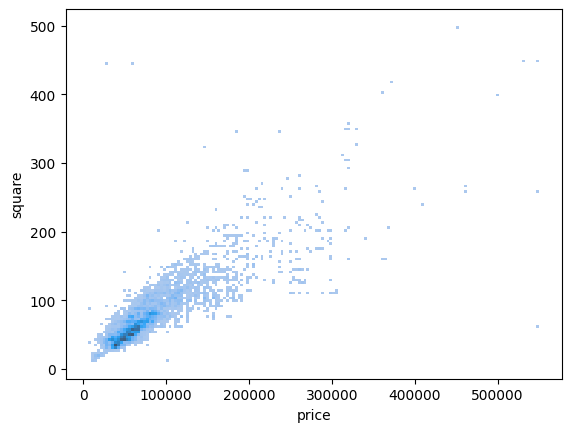

In [8]:
sns.histplot(df, x="price", y = "square")

In [9]:
df = pd.get_dummies(df, columns=['rooms'])
df.head()

,price,m2_price,square,district,micro_district,building_type,floor,floors,year,date,source,condition,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6 и более,rooms_свободная планировка
0,110880,720,154,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,Site,под самоотделку (ПСО),False,False,False,True,False,False,False
1,57000,740,77,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,Site,под самоотделку (ПСО),False,True,False,False,False,False,False
2,57750,750,77,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,Site,под самоотделку (ПСО),False,True,False,False,False,False,False
3,57000,740,77,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,Site,под самоотделку (ПСО),False,True,False,False,False,False,False
4,55000,1279,43,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,Site,хорошее,True,False,False,False,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       10000 non-null  int64  
 1   m2_price                    10000 non-null  int64  
 2   square                      10000 non-null  int64  
 3   district                    9990 non-null   object 
 4   micro_district              9543 non-null   object 
 5   building_type               10000 non-null  object 
 6   floor                       10000 non-null  int64  
 7   floors                      10000 non-null  int64  
 8   year                        5631 non-null   float64
 9   date                        10000 non-null  object 
 10  source                      10000 non-null  object 
 11  condition                   7081 non-null   object 
 12  rooms_1                     10000 non-null  bool   
 13  rooms_2                     1000

In [11]:
# df.date = df.date.apply(lambda x: x.split("-")[0])
# df.head()
df.drop(["date", "year", "source"], axis = 1, inplace= True)


In [12]:
df.isna().sum()

price                            0
m2_price                         0
square                           0
district                        10
micro_district                 457
building_type                    0
floor                            0
floors                           0
condition                     2919
rooms_1                          0
rooms_2                          0
rooms_3                          0
rooms_4                          0
rooms_5                          0
rooms_6 и более                  0
rooms_свободная планировка       0
dtype: int64

In [13]:
for i in df.select_dtypes(include=['float', "int"]).columns:
    df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

price                            0
m2_price                         0
square                           0
district                        10
micro_district                 457
building_type                    0
floor                            0
floors                           0
condition                     2919
rooms_1                          0
rooms_2                          0
rooms_3                          0
rooms_4                          0
rooms_5                          0
rooms_6 и более                  0
rooms_свободная планировка       0
dtype: int64

In [14]:
for i in df.select_dtypes(include=['object']).columns:
    df[i]=df[i].fillna(df[i].mode()[0])
df.isna().sum()

price                         0
m2_price                      0
square                        0
district                      0
micro_district                0
building_type                 0
floor                         0
floors                        0
condition                     0
rooms_1                       0
rooms_2                       0
rooms_3                       0
rooms_4                       0
rooms_5                       0
rooms_6 и более               0
rooms_свободная планировка    0
dtype: int64

In [15]:
col = df.select_dtypes(['object']).columns
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head()

,price,m2_price,square,district,micro_district,building_type,floor,floors,condition,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6 и более,rooms_свободная планировка
0,110880,720,154,1,83,0,12,14,2,False,False,False,True,False,False,False
1,57000,740,77,1,83,0,5,12,2,False,True,False,False,False,False,False
2,57750,750,77,1,83,1,5,12,2,False,True,False,False,False,False,False
3,57000,740,77,1,83,0,5,12,2,False,True,False,False,False,False,False
4,55000,1279,43,0,22,0,1,12,6,True,False,False,False,False,False,False


In [20]:
x = df.drop(["price", "m2_price"], axis=1)
y = df.price


In [21]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3, shuffle=True)

In [22]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
mlp = MLPRegressor()
gb = GradientBoostingRegressor()

In [23]:
for i in [lr, dtr, rfr, mlp, gb ]:
    model = i.fit(trainx, trainy)
    pred = model.predict(testx)
    print(f"{str(i)}\n,{mean_squared_error(testy, pred)}\n,{r2_score(testy, pred)}\n-----------")

LinearRegression()
,464445392.26058775
,0.7652817401407439
-----------
DecisionTreeRegressor()
,377352231.07144284
,0.80929629078675
-----------
RandomForestRegressor()
,208349921.87406763
,0.8947055306845316
-----------


c:\Users\gpro0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()
,471554093.6032322
,0.761689192907401
-----------
GradientBoostingRegressor()
,305806588.082602
,0.8454535422154177
-----------
